<a href="https://colab.research.google.com/github/Meet200/Machine_Learning-/blob/main/Lasso_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is Lasso regression which is implemented on car data set i have used sklearn , numpy ,pandas to develope this model.



In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline 
plt.style.use('ggplot') 
import warnings; warnings.simplefilter('ignore')

In [77]:
# Read CSV File 
# This Model is performed in Auto Data Set 
df = pd.read_csv("https://raw.githubusercontent.com/kirenz/datasets/master/Auto.csv")



In [78]:
df = df.iloc[0:200]
df = df.drop(['name'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           200 non-null    float64
 1   cylinders     200 non-null    int64  
 2   displacement  200 non-null    float64
 3   horsepower    200 non-null    object 
 4   weight        200 non-null    int64  
 5   acceleration  200 non-null    float64
 6   year          200 non-null    int64  
 7   origin        200 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 12.6+ KB


In [79]:
df['origin'] = pd.Categorical(df['origin'])
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
year            0
origin          0
dtype: int64


In [80]:
# drop missing cases
df = df.dropna()


In [81]:
#Data  Standardization
dfs = df.astype('int')
dfs.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   mpg           198 non-null    int64
 1   cylinders     198 non-null    int64
 2   displacement  198 non-null    int64
 3   horsepower    198 non-null    int64
 4   weight        198 non-null    int64
 5   acceleration  198 non-null    int64
 6   year          198 non-null    int64
 7   origin        198 non-null    int64
dtypes: int64(8)
memory usage: 13.9 KB


In [82]:
dfs.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [83]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dfs[['cylinders', 'displacement', 'horsepower', 
     'weight', 'acceleration', 'year', 'origin']] = scaler.fit_transform(dfs[['cylinders', 
                                                                              'displacement', 
                                                                              'horsepower', 
                                                                              'weight', 
                                                                              'acceleration', 
                                                                              'year', 'origin']])

In [84]:


dfs.head(5)



,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18,1.179744,0.726091,0.325216,0.346138,-0.955578,-1.516818,-0.629372
1,15,1.179744,1.100254,1.129264,0.548389,-1.305309,-1.516818,-0.629372
2,18,1.179744,0.821807,0.784672,0.273370,-1.305309,-1.516818,-0.629372
3,16,1.179744,0.699986,0.784672,0.270160,-0.955578,-1.516818,-0.629372
4,17,1.179744,0.682583,0.554944,0.287282,-1.655041,-1.516818,-0.629372


In [85]:
# spliting of data
X = dfs.drop(['mpg'], axis=1)
y = dfs['mpg']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [86]:
# Lasso Regression 
from sklearn.linear_model import Lasso

reg = Lasso(alpha=0.005)
reg.fit(X_train, y_train)

Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 83.95348384136074
Lasso Regression: R^2 score on test set 88.09422781458997


=> here by changing learning rate we can see that by decreasing alpha our R^2 score is increasing and vice-versa 

In [88]:
# lasso with diffrent Lambadas
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)


In [89]:
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

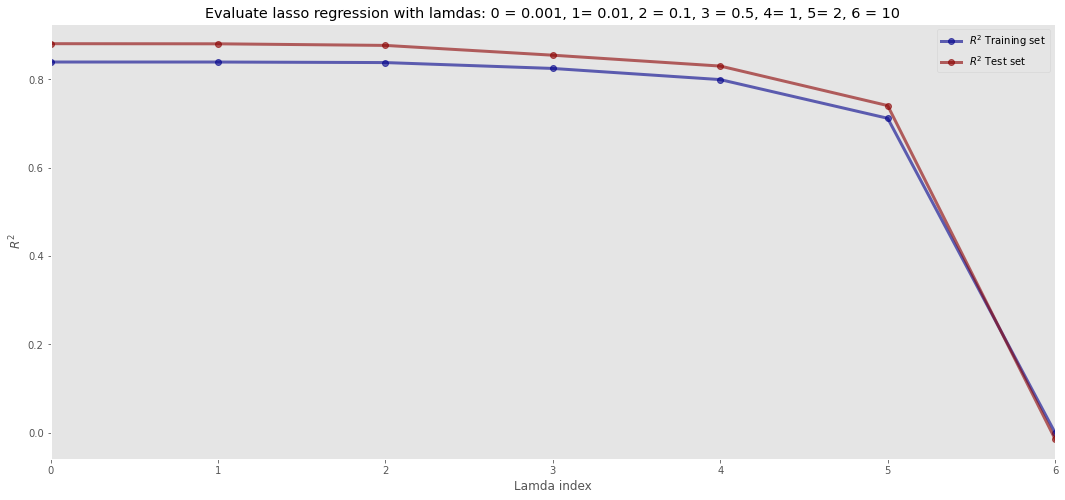

In [90]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

